#Data import

In [ ]:
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
#-----------IMPORT DATASET--------------#
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/My Drive/ML_hw1/dataset/train_set.tsv", sep='\t', header=0)

Mounted at /content/drive


#Classification Task
Since the dataset is strongly unbalanced I tried by applying oversampling.\\\
SMOTE oversampler creates new samples as by comparing with k nearest neighbour, since the resampled set does not contain copies, it is possible to treat it as the new augmented dataset.\\\
I pass the augmented dataset to gridsearch to find the best parameter for fitting, then I show evaluation results.       

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
#Preparing dataset for classification
X_all_class=dataset.iloc[:,:-2]
y_all_class=dataset.iloc[:,-2]
print(X_all_class)

     UAV_1_track       UAV_1_x       UAV_1_y    UAV_1_vx    UAV_1_vy  \
0       0.027068 -62300.591721 -59305.682068    6.705684  247.671970   
1       4.023101 -17220.612570  47439.586909 -167.653031 -138.169553   
2       1.841994 -19900.350438  59030.833595  208.716697  -58.033328   
3       3.621532 -48565.126583 -11986.418570 -113.516305 -218.076997   
4       2.318417  52665.281329 -47498.516869  177.796999 -164.846698   
..           ...           ...           ...         ...         ...   
995     1.069408 -70156.389933  10977.295766  213.943568  117.263798   
996     2.970409 -35222.365570  75522.014012   40.286500 -233.037428   
997     0.819170 -20700.613915  36868.509417  178.147393  166.503507   
998     4.394689  48588.669327 -32320.905331 -202.414834  -66.561909   
999     1.464690 -20386.325378 -69553.280565  247.685574   26.380062   

     UAV_1_target_x  UAV_1_target_y  UAV_2_track       UAV_2_x       UAV_2_y  \
0     -59569.480482    41566.912694     1.474570 -56681

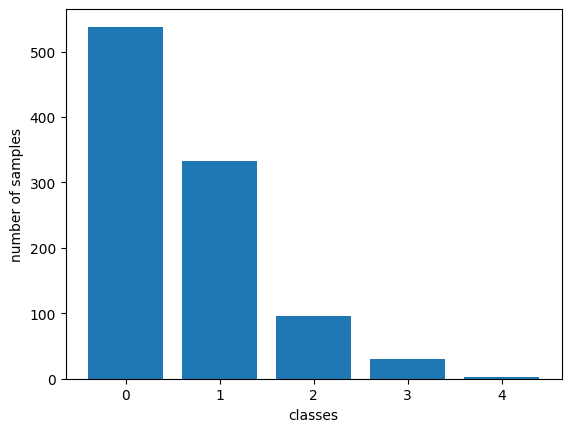

In [ ]:
import matplotlib.pyplot as plt

def plot_classes_dict(y):
  height = np.zeros(5)
  bars = y.drop_duplicates().sort_values()
  for i in bars:
    height[i] = np.count_nonzero(y == i)
  x_pos = np.arange(len(bars))
  plt.bar(x_pos, height)

  plt.xticks(x_pos, bars, color='black')
  plt.yticks(color='black')
  plt.xlabel('classes')
  plt.ylabel('number of samples')

  plt.show()
plot_classes_dict(y_all_class)

##Normalizzazione

In [ ]:
#Normalization
from sklearn.preprocessing import normalize
norm_data=normalize(X_all_class,axis=0)
print(norm_data)

[[ 0.00023933 -0.05313848 -0.04909919 ... -0.00156718  0.02507308
   0.02094523]
 [ 0.03557181 -0.0146881   0.03927524 ... -0.01649372 -0.00170183
  -0.03028357]
 [ 0.01628671 -0.01697374  0.04887164 ...  0.02952306  0.04789941
   0.00384446]
 ...
 [ 0.00724301 -0.01765632  0.03052345 ... -0.03841966 -0.02283019
  -0.0468561 ]
 [ 0.03885735  0.04144307 -0.02675848 ... -0.02233049 -0.02400389
   0.00013894]
 [ 0.01295063 -0.01738825 -0.05758318 ...  0.04822893 -0.03152594
   0.03815684]]


In [ ]:
#My normalization
[n, m]=np.shape(dataset)
print(n, m)
x_max=0
y_max=0
vx_max=0
vy_max=0
track_max=0
dataset.iloc[0,0]
for i in range(0, n):
  for j in range(0, m-2, 7):
    if dataset.iloc[i,j]>track_max: track_max=dataset.iloc[i,j]
    if dataset.iloc[i,j+1]>x_max: x_max=dataset.iloc[i,j+1]
    if dataset.iloc[i,j+2]>y_max: y_max=dataset.iloc[i,j+2]
    if dataset.iloc[i,j+3]>vx_max: vx_max=dataset.iloc[i,j+3]
    if dataset.iloc[i,j+4]>vy_max: vy_max=dataset.iloc[i,j+4]
    if dataset.iloc[i,j+5]>x_max: x_max=dataset.iloc[i,j+5]
    if dataset.iloc[i,j+6]>y_max: y_max=dataset.iloc[i,j+6]
#norm_data=np.arange(35000).reshape((1000,35))
norm_data=np.empty([n, m-2], dtype = float)
print(x_max, y_max, vx_max, vy_max)
for i in range(0, n):
  for j in range(0, m-2, 7):
    norm_data[i,j]=dataset.iloc[i,j]/track_max
    norm_data[i,j+1]=dataset.iloc[i,j+1]/x_max
    norm_data[i,j+2]=dataset.iloc[i,j+2]/y_max
    norm_data[i,j+3]=dataset.iloc[i,j+3]/vx_max
    norm_data[i,j+4]=dataset.iloc[i,j+4]/vy_max
    norm_data[i,j+5]=dataset.iloc[i,j+5]/x_max
    norm_data[i,j+6]=dataset.iloc[i,j+6]/y_max
print(norm_data)

In [ ]:
#split
X_train, X_test, y_train, y_test = train_test_split(norm_data, y_all_class, test_size=0.333, random_state=7)

##Oversampling

In [ ]:
#Random over_sampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(norm_data, y_all_class)
#Count the new number of items
print(sorted(Counter(y_resampled).items()))
#Now all classes contains 538 samples, the samples are just taken multiple times
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.333, random_state=7)

[(0, 538), (1, 538), (2, 538), (3, 538), (4, 538)]


Since for class "4" there where only 3 samples maybe repeating them too much can create a problem. It is possible to use the parameter shrinkage to create a smoothed bootstrap

In [ ]:
from imblearn.over_sampling._smote.cluster import KMeansSMOTE
from collections import Counter
#Adasyn over_sampling should avoid copies problem
from imblearn.over_sampling import SMOTE, ADASYN ,BorderlineSMOTE; KMeansSMOTE
#X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(X_all_class, y_all_class)
X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(norm_data, y_all_class)
print(sorted(Counter(y_resampled).items()))
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.333, random_state=7)
#plot_classes_dict(y_resampled)

[(0, 538), (1, 538), (2, 538), (3, 538), (4, 538)]


In [ ]:
#manual augmentation
from itertools import permutations
def swap_sample(single_sample):
  perm=permutations([0,1, 2, 3,4])
  perm=np.array(list(perm))
  new_samples=np.empty([np.shape(perm)[0],5,7], dtype = float)
  out=np.empty([np.shape(perm)[0]-1,35], dtype = float)
  for i in range(np.shape(perm)[0]):
    for j in range(5):
      new_samples[i,j]=np.copy(single_sample[perm[i,j]*7:(perm[i,j]+1)*7])
  for i in range(np.shape(perm)[0]):
    temp_var=np.asarray((new_samples[i]).reshape(-1),dtype=float)
  return out
y=np.array(y_all_class)
samples_c4=np.where(y==4)[0]
for sample in samples_c4:
  swaps=swap_sample(norm_data[sample])
  print(np.shape(swaps))

(119, 35)
(119, 35)
(119, 35)


##Model choice and fit

In [ ]:
#Model choice and fit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#model= RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200) #class_weight="balanced",
model= svm.SVC(kernel='rbf', C=9)
#model= AdaBoostClassifier(n_estimators=100, random_state=7)
#model= LinearSVC(C=10)
#model= GaussianNB()
model = model.fit(X_train, y_train)


In [ ]:
#grid search SvC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {'kernel':['poly', 'rbf'], 'C':np.arange(1,9,1), 'degree':np.arange(1,5,1)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_resampled, y_resampled)
GridSearchCV(estimator=SVC(), param_grid=parameters)
sorted(clf.cv_results_.keys())
print(clf.cv_results_)
print(clf.best_estimator_ ,clf.best_score_)

In [ ]:
#grid search Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_depth':[5,10,15,20, 50, 100], 'n_estimators':[5, 10, 50, 100, 150, 200]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(norm_data, y_all_class)
GridSearchCV(estimator=SVC(), param_grid=parameters)
sorted(clf.cv_results_.keys())
print(clf.cv_results_)
print(clf.best_estimator_ ,clf.best_score_)

##Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)
print("Accuracy %.3f" %acc)
from sklearn.metrics import balanced_accuracy_score
acc1=balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy %.3f" %acc1)
class_names=np.array(["0","1","2","3","4"])
print(classification_report(y_test, y_pred, labels=[0,1,2,3,4], target_names=class_names, digits=3))

Accuracy 0.864
Balanced accuracy 0.868
              precision    recall  f1-score   support

           0      0.677     0.638     0.657       174
           1      0.725     0.704     0.714       199
           2      0.924     1.000     0.961       171
           3      0.988     1.000     0.994       171
           4      1.000     1.000     1.000       181

    accuracy                          0.864       896
   macro avg      0.863     0.868     0.865       896
weighted avg      0.860     0.864     0.861       896



[[106  19  42   7   0]
 [ 74  64  42  18   1]
 [  5   8 152   3   3]
 [  1   0   2 168   0]
 [  0   0   0   0 181]]


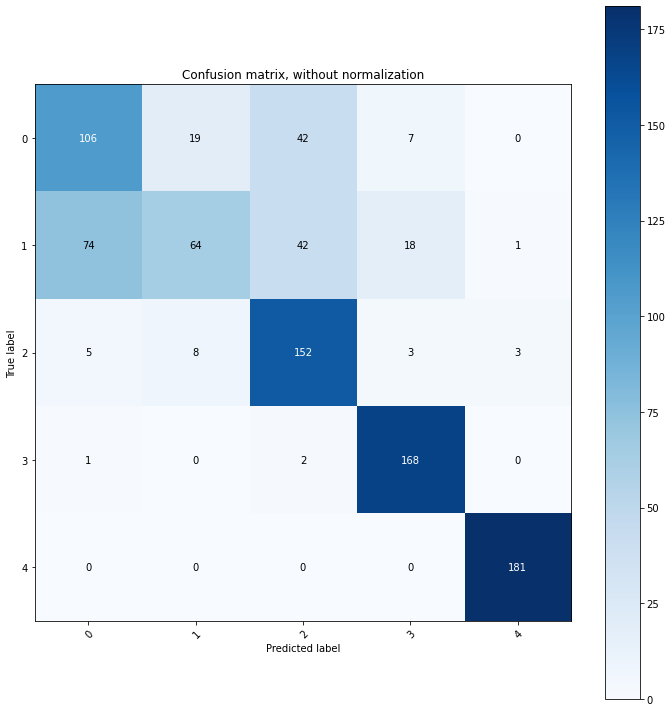

In [ ]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plt.rcParams["figure.figsize"] = (10,10)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

##K-fold cross validation

In [ ]:
#K-Fold Cross Validation
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, random_state=0)
cv = ShuffleSplit(n_splits=100, test_size=0.2)
scores = cross_val_score(model, X_resampled, y_resampled, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72862454 0.73605948 0.74163569 0.78996283 0.75650558 0.75092937
 0.74535316 0.73048327 0.75464684 0.78066914 0.74535316 0.78624535
 0.76579926 0.73605948 0.79553903 0.76022305 0.77509294 0.78252788
 0.7527881  0.76951673 0.74907063 0.79739777 0.75836431 0.7472119
 0.73977695 0.75092937 0.77137546 0.78624535 0.74163569 0.75092937
 0.79182156 0.78624535 0.76951673 0.76208178 0.76765799 0.79182156
 0.7527881  0.74349442 0.7472119  0.78252788 0.80855019 0.75092937
 0.73234201 0.78438662 0.74535316 0.72304833 0.76394052 0.76022305
 0.73420074 0.7527881  0.74535316 0.79182156 0.77509294 0.77137546
 0.7732342  0.77509294 0.76208178 0.76394052 0.74163569 0.76022305
 0.76765799 0.7527881  0.7732342  0.79182156 0.76579926 0.75464684
 0.70817844 0.76208178 0.77137546 0.77881041 0.76765799 0.74907063
 0.77509294 0.77509294 0.78252788 0.76394052 0.7267658  0.77881041
 0.77137546 0.78624535 0.78066914 0.7527881  0.75836431 0.78438662
 0.75092937 0.76579926 0.73977695 0.73977695 0.78438662 0.78066

#Regression task


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
import statistics as st
import seaborn

In [ ]:
X_all_regr=dataset.iloc[:,:-2]
y_all_regr=dataset.iloc[:,-1]
regr_data=pd.concat([X_all_regr, y_all_regr], axis=1)
#X_all_regr['UAV_1_track'][0]
z=np.array(X_all_regr.iloc[:,:])
#print(regr_data.columns)

In [ ]:
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_all_regr, y_all_regr, test_size=0.33, random_state=42)

##Normalization

In [ ]:
#normalizzation all even the output
from sklearn.preprocessing import normalize
col=regr_data.columns
ind=regr_data.index
norm_data=normalize(regr_data,axis=0)
norm_data=pd.DataFrame(norm_data, columns=col)
print(norm_data)

In [ ]:
#normalize only the input
from sklearn.preprocessing import normalize
col=regr_data.columns
ind=regr_data.index
norm_data=normalize(regr_data.iloc[:,:-1],axis=0)
print(np.shape(norm_data))
y=np.array(regr_data.iloc[:,-1]).reshape(1000,1)
print(np.shape(y))
norm_data=np.concatenate((norm_data,y),axis=1)
norm_data=pd.DataFrame(norm_data, columns=col)
print(norm_data)

In [ ]:
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(norm_data.iloc[:,:-1], norm_data.iloc[:,-1], test_size=0.33, random_state=7)

##Kernel


In [ ]:
#kernel
def k(u,v):
  v1 = st.variance(u)
  v2 = st.variance(v)
  d = np.abs(v1-v2)
  #return 1.0/(d+1)**2
  return d**2

def my_kernel(U, V):
  N = len(U)
  M = len(V)
  K = np.empty((N,M), dtype=float)
  for i in range(0,N):
    for j in range(i+1,M):
      K[i][j] = k(U[i],V[j])
  return K

#K = my_kernel(norm_data,norm_data)


##Oversample

In [ ]:
!pip install smogn
import smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


r_index: 100%|##########| 47/47 [00:00<00:00, 73.59it/s]


[  194.15450043  4948.76425215 10374.39594476 19059.34303755
 39589.24229714]
[  194.15450043 11655.78470431 26464.83017    33607.26842202
 57961.96435543]


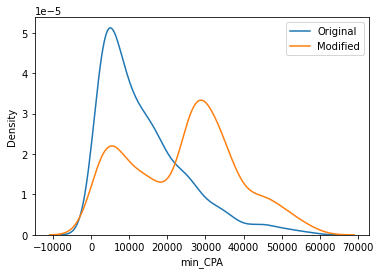

In [ ]:
#Smogn oversample
resampled_data=smogn.smoter(regr_data, y="min_CPA")
#print (resampled_data)
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(resampled_data.iloc[:,:-1], resampled_data.iloc[:,-1], test_size=0.33, random_state=7)
print(smogn.box_plot_stats(regr_data['min_CPA'])['stats'])
print(smogn.box_plot_stats(resampled_data['min_CPA'])['stats'])
seaborn.kdeplot(regr_data['min_CPA'], label = "Original")
seaborn.kdeplot(np.array(resampled_data['min_CPA']), label = "Modified")
plt.legend()

In [ ]:
## specify phi relevance values
matrix = [

    [0,     0, 0],  ## over-sample ("minority")
    [10000, 0, 0],  ## under-sample ("majority")
    [20000, 0, 0],  ## under-sample
    [40000, 0, 0],
    [50000, 1, 0],  ## under-sample
]
resampled_data = smogn.smoter(

    ## main arguments
    data = regr_data,           ## pandas dataframe
    y = 'min_CPA',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.02,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = matrix ## 2d array (format: [x, y])
    )
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(resampled_data.iloc[:,:-1], resampled_data.iloc[:,-1], test_size=0.33, random_state=7)
print(smogn.box_plot_stats(regr_data['min_CPA'])['stats'])
print(smogn.box_plot_stats(resampled_data['min_CPA'])['stats'])
seaborn.kdeplot(regr_data['min_CPA'], label = "Original")
seaborn.kdeplot(np.array(resampled_data['min_CPA']), label = "Modified")
plt.legend()

r_index: 100%|##########| 21/21 [00:00<00:00, 77.70it/s]


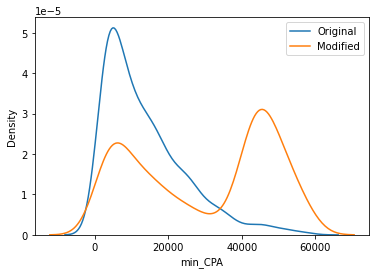

In [ ]:
from pandas.core.accessor import register_dataframe_accessor
resampled_data = smogn.smoter(

    ## main arguments
    data = regr_data,           ## pandas dataframe
    y = 'min_CPA',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(resampled_data.iloc[:,:-1], resampled_data.iloc[:,-1], test_size=0.33, random_state=7)
#print(smogn.box_plot_stats(register_dataframe_accessor['min_CPA'])['stats'])
#print(smogn.box_plot_stats(resampled_data['min_CPA'])['stats'])
seaborn.kdeplot(regr_data['min_CPA'], label = "Original")
seaborn.kdeplot(np.array(resampled_data['min_CPA']), label = "Modified")
plt.legend()

In [ ]:
print(np.shape(resampled_data))

(1931, 36)


##Moldel choice and fit

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=3)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=0)

regr_1.fit(X_train_regr, y_train_regr)
regr_2.fit(X_train_regr, y_train_regr)

y_1 = regr_1.predict(X_test_regr)
y_2 = regr_2.predict(X_test_regr)
# The mean squared error
print("Root mean squared error: %.2f"
      % mean_squared_error(y_test_regr, y_2,squared=False))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test_regr, y_2))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test_regr, y_2))

Root mean squared error: 7947.39
Mean absolute error: 6097.58
Regression score: 0.82


In [ ]:
# The root mean squared error
print("Root mean squared error: %.2f"
      % mean_squared_error(y_test_regr, y_1,squared=False))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test_regr, y_1))
# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test_regr, y_1))

Root mean squared error: 12064.52
Mean absolute error: 9447.54
Regression score: 0.28


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=200, random_state=5)
#model = KNeighborsRegressor(n_neighbors=3, algorithm="auto")
model = KNeighborsRegressor(metric= 'minkowski', n_neighbors= 3, p= 1, weights='distance')
#model =  KernelRidge(alpha=1.0)
#model = SVR(kernel='poly', C=10, degree=5, gamma='scale')
#model = SVR(kernel='linear', C=10)
#model = SVR(kernel=my_kernel)   ##########  MY KERNEL  #################
#model = linear_model.LinearRegression()
# Train the model using the training sets
model.fit(X_train_regr, y_train_regr)


KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [ ]:
# Make predictions using the testing set
y_pred_regr = model.predict(X_test_regr)

# The root mean squared error
print("Root mean squared error: %.2f"
      % mean_squared_error(y_test_regr, y_pred_regr, squared=False))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test_regr, y_pred_regr))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test_regr, y_pred_regr))

Root mean squared error: 12076.47
Mean absolute error: 8042.31
Regression score: 0.28


##Gridsearch to fine tune

In [ ]:
grid_search_regression = GridSearchCV(model,
                           {
                            'n_neighbors':[1,3,5,7,9,11,23,35,47,59],
                            'weights': ('uniform', 'distance'),
                            'p': np.arange(1,5),
                            'metric': ('chebyshev', 'minkowski')
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(X_train_regr,y_train_regr))




Grid Search for Regression


Fitting 5 folds for each of 160 candidates, totalling 800 fits
GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=17, weights='distance'),
             n_jobs=-1,
             param_grid={'metric': ('chebyshev', 'minkowski'),
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 23, 35, 47, 59],
                         'p': array([1, 2, 3, 4]),
                         'weights': ('uniform', 'distance')},
             scoring='r2', verbose=1)


In [ ]:
grid_search_regression = GridSearchCV(model,
                           {
                            'C':np.arange(1,15,2),
                            'kernel': ('rbf','poly'),
                            'degree': np.arange(1,7,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(X_train_regr,y_train_regr))



Grid Search for Regression


Fitting 5 folds for each of 84 candidates, totalling 420 fits
GridSearchCV(cv=5, estimator=SVR(C=10, degree=5, kernel='poly'), n_jobs=-1,
             param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'degree': array([1, 2, 3, 4, 5, 6]),
                         'kernel': ('rbf', 'poly')},
             scoring='r2', verbose=1)


In [ ]:
print(grid_search_regression.best_params_)
print(grid_search_regression.best_score_)

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.29570552165974384


In [ ]:
# Make predictions using the testing set
y_pred_regr = grid_search_regression.predict(X_test_regr)

# The root mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_regr, y_pred_regr, squared=False))
# The mean absolute error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test_regr, y_pred_regr))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test_regr, y_pred_regr))

Mean squared error: 12076.47
Mean absolute error: 8042.31
Regression score: 0.28
